# Module 3- Regression & Beta Calculation



   ### Welcome to the Answer notebook for Module 3 ! 
Make sure that you've submitted the module 2 notebook and unlocked Module 3 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

## Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
import seaborn as sns
import datetime

In [2]:
df=pd.read_csv('GOLD.csv')

In [3]:
pdf=df[np.isnan(df['Pred'])==False]

In [4]:
x=pdf[['Price','Open','High','Low']].values

In [5]:
y=pdf[['Pred']].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
x_test.shape

(83, 4)

In [8]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
reg.coef_

array([[ 2.,  3., -1., -4.]])

In [10]:
y_pred=reg.predict(x_test)


In [11]:
reg_df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
reg_df.head(12)

,Actual,Predicted
0,337.0,337.0
1,230.0,230.0
2,524.0,524.0
3,306.0,306.0
4,262.0,262.0
5,152.0,152.0
6,238.0,238.0
7,234.0,234.0
8,-125.0,-125.0
9,892.0,892.0


In [12]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),5) ) 
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),5))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


([array([ 5., 11., 18., 12., 18.,  8.,  4.,  2.,  3.,  2.]),
  array([ 5., 11., 18., 12., 18.,  8.,  4.,  2.,  3.,  2.])],
 array([-146.,  -28.,   90.,  208.,  326.,  444.,  562.,  680.,  798.,
         916., 1034.]),
 <a list of 2 Lists of Patches objects>)

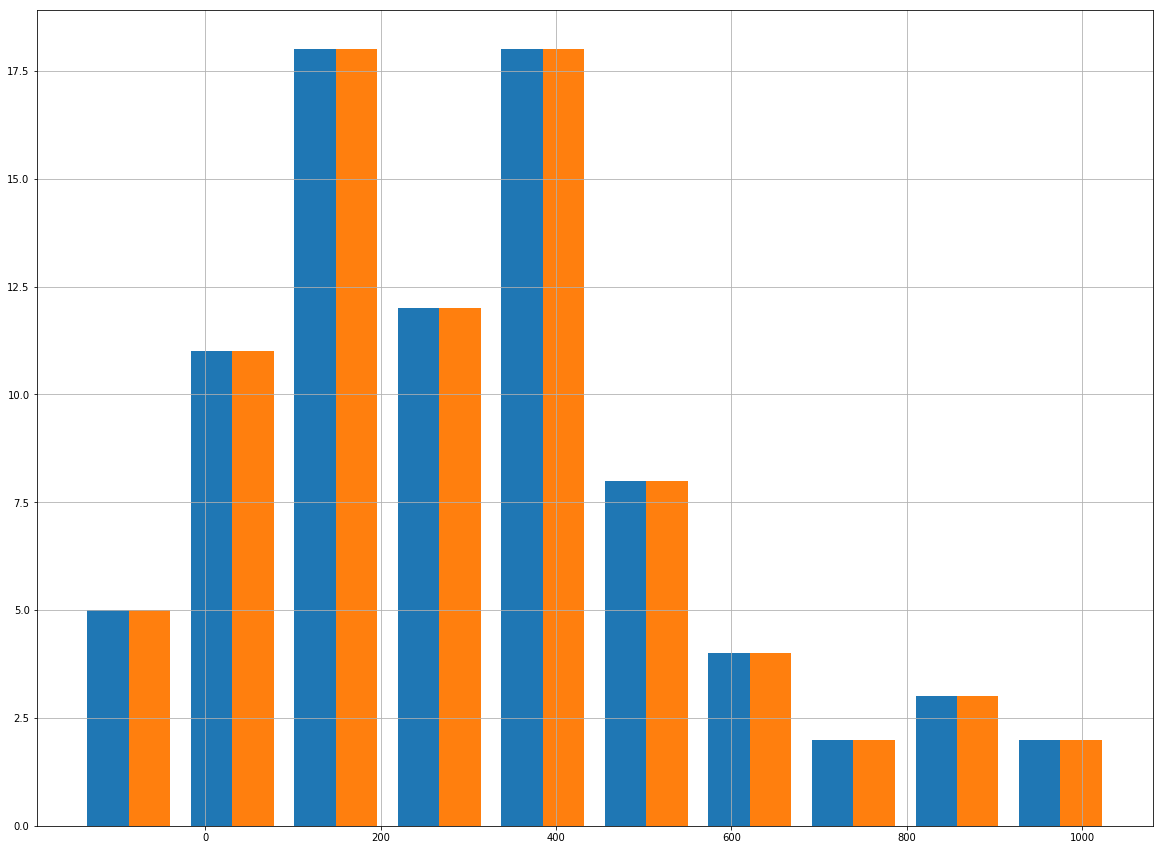

In [13]:
fig1, ax1 = plt.subplots(figsize=(20,15))
ax1.grid()
plt.hist([y_pred.flatten(),y_test.flatten()])

#### Since the Error is approximately 0 hence the pred column is a linear combination of the OHLC prices

In [14]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
ddf=df[np.isnan(df['Pred'])==True]

In [16]:
dataset=ddf[['Price','Open','High','Low']].values
arr=reg.predict(dataset)

In [17]:
for index in ddf.index:
    df.loc[index,'Pred']=arr[index-ddf.index[0]]

In [18]:
x1=df[['Price','Open','High','Low']].values
y1=df[['new']].values

In [19]:
x1_train, x1_test, y1_train, y1_test=train_test_split(x1, y1, test_size=0.2)

In [20]:
reg.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
new_arr=reg.predict(x1_test)

In [22]:
new_df=pd.DataFrame({'Actual':y1_test.flatten(),'Predicted':new_arr.flatten()})
new_df.head(10)

,Actual,Predicted
0,27.362578,27.645430
1,97.289776,97.062100
2,135.606755,135.574366
3,186.706916,186.911552
4,170.166889,169.608488
5,112.293483,112.246199
6,37.212629,36.734147
7,148.676184,148.652104
8,252.150907,252.489406
9,208.304601,207.987323


In [23]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y1_test, new_arr),5) ) 
print('Mean Squared Error:', round(metrics.mean_squared_error(y1_test, new_arr),5))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y1_test, new_arr)),5))

Mean Absolute Error: 0.40721
Mean Squared Error: 0.2286
Root Mean Squared Error: 0.47812


([array([31., 22., 16.,  9.,  7.,  7.,  3.,  2.,  2.,  4.]),
  array([30., 23., 16.,  9.,  7.,  7.,  3.,  2.,  2.,  4.])],
 array([ 27.36257833, 104.3029806 , 181.24338286, 258.18378512,
        335.12418739, 412.06458965, 489.00499191, 565.94539418,
        642.88579644, 719.8261987 , 796.76660097]),
 <a list of 2 Lists of Patches objects>)

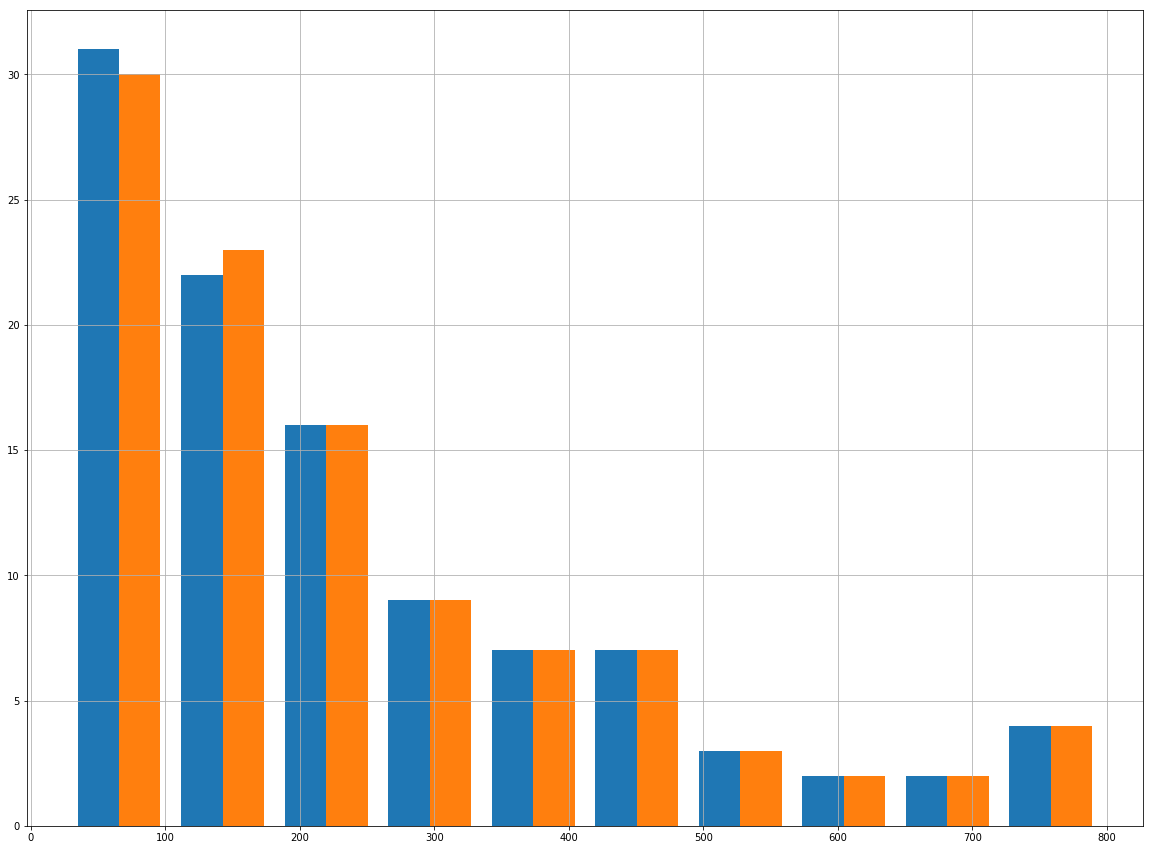

In [24]:
fig2, ax2 = plt.subplots(figsize=(20,15))
ax2.grid()
plt.hist([new_arr.flatten(),y1_test.flatten()])

### The histogram also shows some error in the prediction hence the 'Pred' column is the linear combination of OHLC prices and 'New' Column is the polynomial combination of OHLC prices


## query 3.2 
Import the stock of your choosing AND the Nifty index.
Using linear regression (OLS), calculate -
<ol>
<li>The daily Beta value for the past 3 months. (Daily= Daily returns)
<li>The monthly Beta value. (Monthly= Monthly returns)
</ol>
Refrain from using the (covariance(x,y)/variance(x)) formula.
Attempt the question using regression.(Regression Reference)
Were the Beta values more or less than 1 ? What if it was negative ?
Discuss. Include a brief writeup in the bottom of your Jupyter notebook with your inferences from the Beta values
and regression results


In [25]:
apollo_df=pd.read_csv('APOLLOTYRE.csv')
nifty_df=pd.read_csv('Nifty50.csv')

In [26]:
beta_df=pd.DataFrame({'Date':apollo_df['Date'],'Stock':apollo_df['Close Price'],'Market':nifty_df['Close']})

In [27]:
beta_df['Date']=pd.to_datetime(beta_df['Date'])

In [28]:
beta_df['Stock Return']=beta_df['Stock'].pct_change()
beta_df['Market Return']=beta_df['Market'].pct_change()

In [29]:
daily_stock_return=beta_df[['Stock Return']][-90:len(beta_df)].values
daily_market_return=beta_df[['Market Return']][-90:len(beta_df)].values

In [30]:
daily_reg=LinearRegression()
daily_reg.fit(daily_market_return,daily_stock_return)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
daily_reg.coef_

array([[0.93542261]])

In [32]:
daily_reg.intercept_

array([-0.00271196])

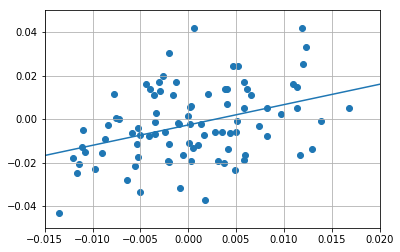

In [33]:
fig3,ax3=plt.subplots()
ax3.scatter(daily_market_return,daily_stock_return)
ax3.grid()
ax3.set_xlim(-0.015,0.020)
ax3.set_ylim(-0.05,0.05)
var=np.linspace(-1,1,100).reshape(-1,1)
ax3.plot(var,var*daily_reg.coef_+daily_reg.intercept_)

### Therefore the daily beta value for the last 90 days is: 0.935


In [34]:
beta_df['Month']=pd.DatetimeIndex(beta_df['Date']).month
beta_df['Year']=pd.DatetimeIndex(beta_df["Date"]).year
groups=beta_df.groupby(['Year','Month'])


In [35]:
month_df=pd.DataFrame(columns=beta_df.columns)
for group in groups:
    dfd=group[1][group[1]['Date']==max(group[1]['Date'])]
    month_df=month_df.append(dfd)
month_df.reset_index(inplace=True,drop=True)

In [36]:
month_df['Stock Return']=month_df['Stock'].pct_change()
month_df['Market Return']=month_df['Market'].pct_change()
month_df=month_df[np.isnan(month_df['Stock Return'])==False]

In [37]:
monthly_stock_return=month_df[['Stock Return']].values
monthly_market_return=month_df[['Market Return']].values

In [38]:
monthly_reg=LinearRegression()
monthly_reg.fit(monthly_market_return,monthly_stock_return)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
monthly_reg.coef_

array([[0.81427014]])

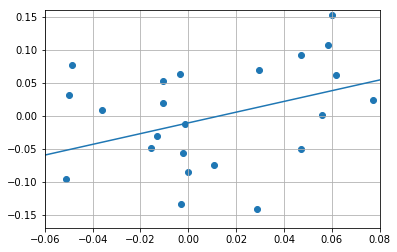

In [40]:
fig4,ax4=plt.subplots()
ax4.scatter(monthly_market_return,monthly_stock_return)
ax4.grid()
ax4.set_xlim(-0.06,0.08)
ax4.set_ylim(-0.17,0.16)
var=np.linspace(-1,1,100).reshape(-1,1)
ax4.plot(var,var*monthly_reg.coef_+monthly_reg.intercept_)

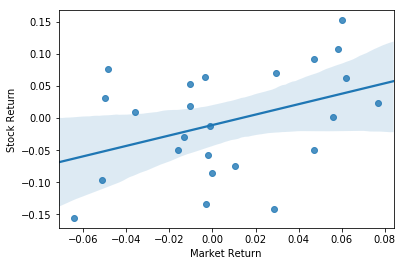

In [41]:
sns.regplot(x='Market Return',y='Stock Return',data=month_df)

### The monthly beta value was 0.814

### The beta value as per the $r_s=\alpha+ \beta r_m $ folmula represents the rate at which the stock value will change with the market, as per definition the market has a $\beta$ of 1
***
### The beta for diffrent cases are:
### * Daily $\beta_d$=0.935
### * Monthly $\beta_m$=0.935
---
### A lower beta value will represent less risk less reward type stock, where the gain is not that much but the risk of lossing money is also less
### A higher beta value represent high risk high reward stock, where the gains are also high and the losses are also high
--- 
### A negetive value for $\beta$ means when the maket decreases the valu of the stock will increase and vice-versa, which can be beneficial for divesification as while other stocks will loose moeny this can increase in value